# EDA and Statistical Analysis of Credit Card Dataset

# PART-A

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import percentileofscore
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import t
import math
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings('ignore')

The following are the ages of CEOs of 42 Top Fortune 500 Companies when they took over the post of CEO

age_of_ceo = [57, 61, 57, 57, 58, 57, 61, 54, 68, 51, 49, 64, 50, 48, 65, 52, 56, 46, 54, 49, 50, 47, 55, 55, 54, 42, 51, 56, 55, 54, 51, 60, 62, 43, 55, 56, 61, 52, 69, 64, 46, 54]

Use this data for answering following questions where relevant.

#### Q1. Compute the mean, median and the mode of the data

In [2]:
age_of_ceo = [57, 61, 57, 57, 58, 57, 61, 54, 68, 51, 49, 64, 50, 48, 65, 52, 56, 46, 54, 49, 50, 47, 55, 55, 54, 42, 51, 56, 55, 54, 51, 60, 62, 43, 55, 56, 61, 52, 69, 64, 46, 54]

In [3]:
age = np.array(age_of_ceo)
ageseries = pd.Series(age_of_ceo)
mean = np.mean(age)
median = np.median(age)
mode = ageseries.mode()

print("Mean:",mean)
print("Median:",median)
print("Mode:",mode)

Mean: 54.904761904761905
Median: 55.0
Mode: 0    54
dtype: int64


#### Q2. Compute the range , variance and standard deviation of CEO ages

In [4]:
rang = ageseries.max() - ageseries.min()
variance = ageseries.var()
std = ageseries.std()
print("Range:",rang)
print("Variance:",variance)
print("Standard Deviation:",std)

Range: 27
Variance: 39.4541231126597
Standard Deviation: 6.2812517154353635


#### Q3. Find the mean deviation for the data . The mean deviation is defined asbelow.

In [5]:
x = age_of_ceo[0]
xbar = (sum(age_of_ceo))/len(age_of_ceo)
n = len(age_of_ceo)

mean_deviation = (abs(x-xbar))/n

print("Mean Deviation:",mean_deviation)

Mean Deviation: 0.04988662131519274


#### Q4. Calculate the Pearson coefficient of skewness and comment on the skewness of the data

In [6]:

skewness = (3*(xbar-median))/std
print('Skewness:',skewness)

Skewness: -0.04548683903435661


This implies that data is negatively or left skewed

#### Q5. Count the number of data values that fall within two standard deviations of the mean. Compare this with the answer from Chebyshev’s Theorem.

In [7]:
mean_age = np.mean(age_of_ceo)

std_dev_age = np.std(age_of_ceo)

lower_bound = mean_age - 2 * std_dev_age
upper_bound = mean_age + 2 * std_dev_age

count_within_range = len([age for age in age_of_ceo if lower_bound <= age <= upper_bound])

print("Number of data values within two standard deviations of the mean:", count_within_range)


Number of data values within two standard deviations of the mean: 39


In [8]:
# Applying Chebyshev's Theorem
k = 2
res = 1 - 1/k**2
res

0.75

We found that the number of data values falling within two standard deviations of the mean is 39.

According to Chebyshev's Theorem, at least 75% of the data values must lie within two standard deviations of the mean.

Since we have 39 data values within this range out of a total of 42 data values, which is approximately 92.8%, our empirical result is consistent with Chebyshev's Theorem, as it suggests that at least 75% of the data values should fall within two standard deviations of the mean, and our observed percentage exceeds this minimum requirement.

#### Q6. Find the three quartiles and the interquartile range (IQR).

In [9]:
quartiles = np.quantile(age_of_ceo, [0.25, 0.5, 0.75])
Q1 = quartiles[0]
Q2 = quartiles[1]
Q3 = quartiles[2]
IQR = Q3 - Q1

print("First Quartile (Q1):", Q1)
print("Second Quartile (Q2 or median):", Q2)
print("Third Quartile (Q3):", Q3)
print("Interquartile Range (IQR):", IQR)

First Quartile (Q1): 51.0
Second Quartile (Q2 or median): 55.0
Third Quartile (Q3): 57.75
Interquartile Range (IQR): 6.75


#### Q7. Are there any outliers in the data set ? 

In [10]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = [age for age in age_of_ceo if age < lower_bound or age > upper_bound]

if outliers:
    print("Outliers in the data set:", outliers)
else:
    print("No outliers found in the data set.")

Outliers in the data set: [68, 69]


#### Q8.Draw a boxplot of the dataset to confirm .

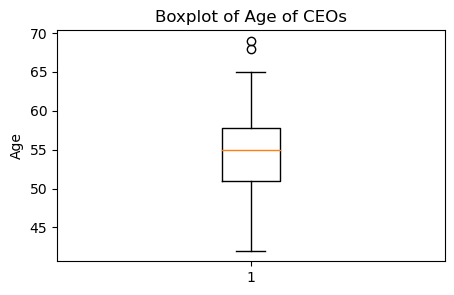

In [11]:
plt.figure(figsize=(5, 3))
plt.boxplot(age_of_ceo)
plt.title('Boxplot of Age of CEOs')
plt.ylabel('Age')
plt.show()

Plot also shows few outliers. Hence, we can infer from the plot that there are few outliers present

#### Q9. Find the percentile rank of the datapoint 50.

In [12]:
percentile_rank_50 = percentileofscore(age_of_ceo, 50)

print("Percentile rank of the data point 50:", percentile_rank_50)

Percentile rank of the data point 50: 22.61904761904762


#### Q10. What is the probability that a person becoming a CEO is below 50 yearsof age ?

In [13]:
count_below_50 = sum(age < 50 for age in age_of_ceo)

total_ceos = len(age_of_ceo)

probability_below_50 = count_below_50 / total_ceos

print("Probability that a person becoming a CEO is below 50 years of age:", probability_below_50)

Probability that a person becoming a CEO is below 50 years of age: 0.19047619047619047


#### Q11. Create a frequency distribution for the data and visualize it appropriately

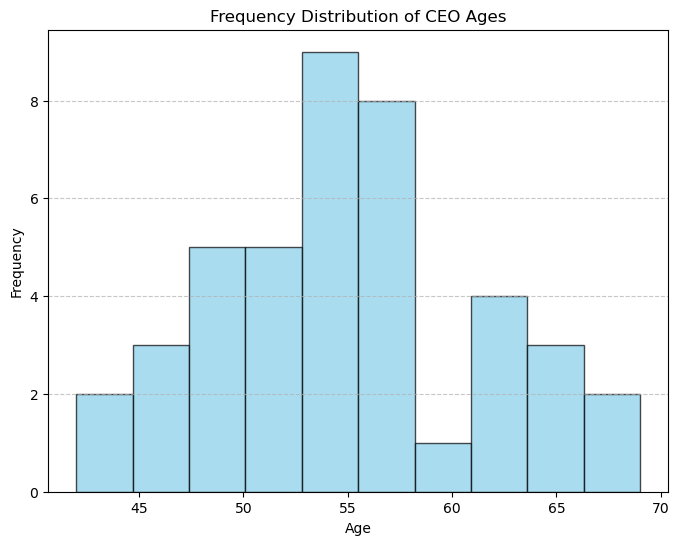

In [14]:
plt.figure(figsize=(8, 6))
plt.hist(age_of_ceo, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Frequency Distribution of CEO Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Q12. Create a probability distribution of the data and visualize it appropriately.

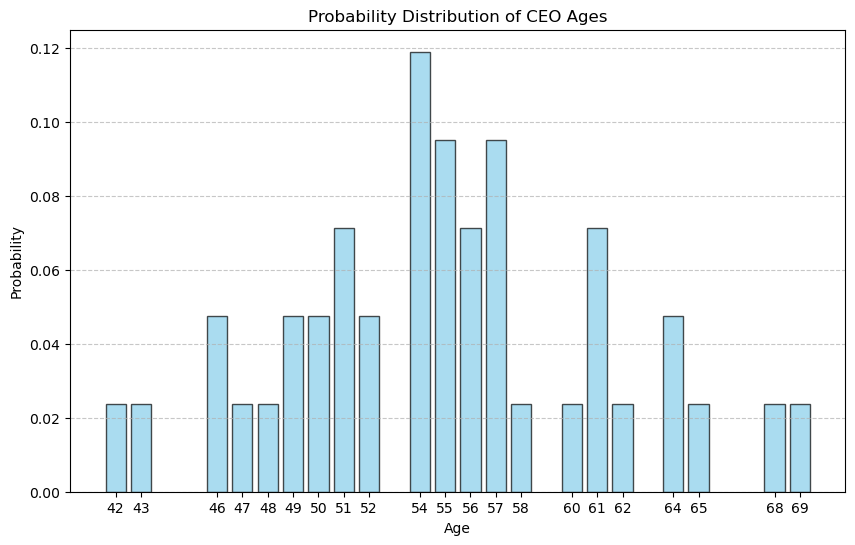

In [15]:
unique_age, counts = np.unique(age_of_ceo, return_counts=True)
total_ceos = len(age_of_ceo)
probability_distribution = counts / total_ceos

plt.figure(figsize=(10, 6))
plt.bar(unique_age, probability_distribution, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Probability Distribution of CEO Ages')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.xticks(unique_age)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Q13. What is the shape of the distribution of this dataset? Create an appropriate graph to determine that. Take 100 random samples with replacement from this dataset of size 5 each. Create a sampling distribution ofthe mean age of customers. Compare with other sampling distributions of sample size 10, 15, 20, 25, 30. State your observations. Does it corroborate the Central Limit Theorem?

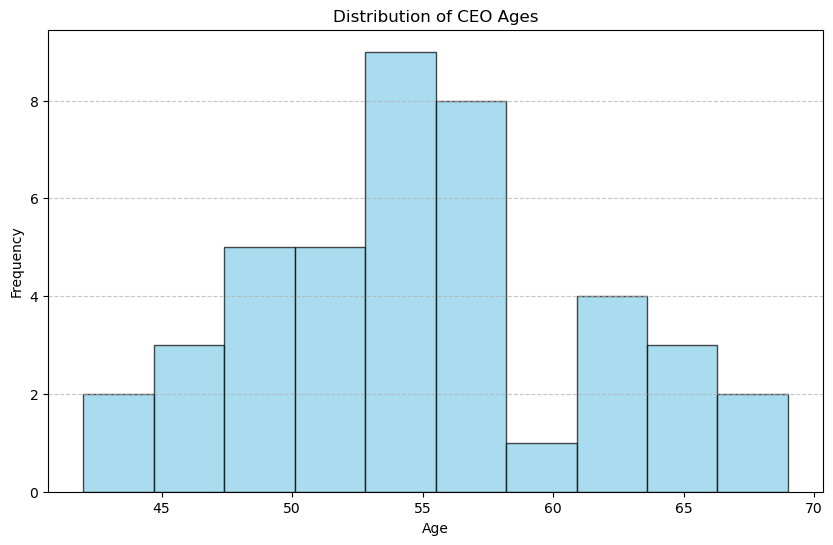

In [16]:
# shape of the distribution of dataset

plt.figure(figsize=(10, 6))
plt.hist(age_of_ceo, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of CEO Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [17]:
# sampling distributions of the mean age for different sample sizes
sample_sizes = [5, 10, 15, 20, 25, 30]
num_samples = 100
sampling_distributions = {}

for size in sample_sizes:
    means = []
    for _ in range(num_samples):
        sample = np.random.choice(age_of_ceo, size=size, replace=True)
        sample_mean = np.mean(sample)
        means.append(sample_mean)
    sampling_distributions[size] = means

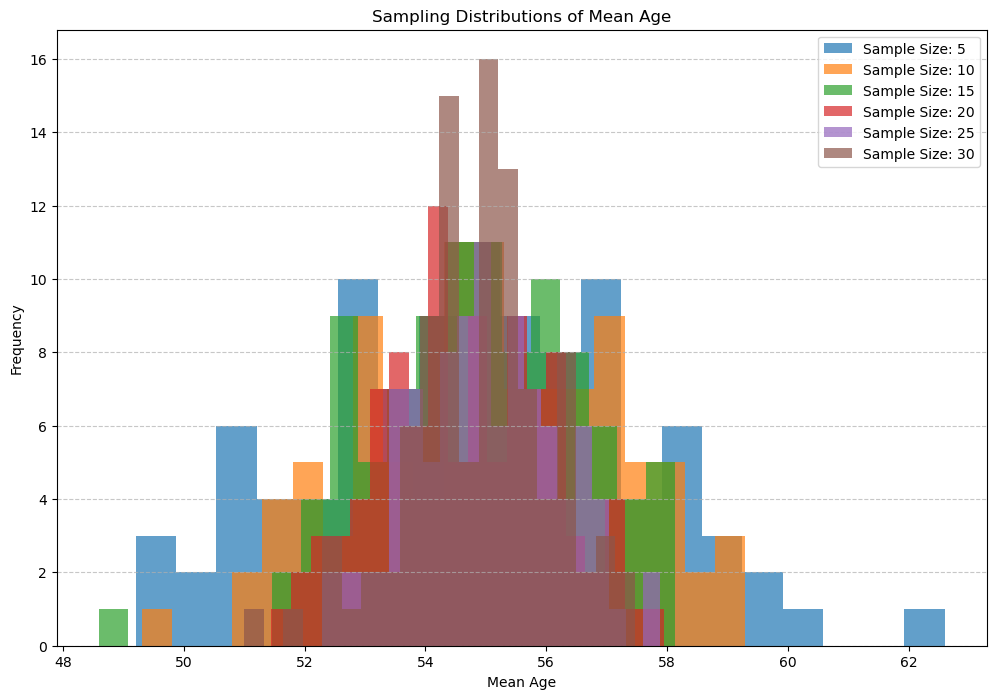

In [18]:
plt.figure(figsize=(12, 8))
for size, means in sampling_distributions.items():
    plt.hist(means, bins=20, alpha=0.7, label=f'Sample Size: {size}')

plt.title('Sampling Distributions of Mean Age')
plt.xlabel('Mean Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

As the sample size increases, the sampling distributions tend to become more normally distributed.
The spread of the sampling distributions decreases as the sample size increases.
The means of the sampling distributions are approximately centered around the true mean of the population.
This behavior corroborates the Central Limit Theorem, which states that the sampling distribution of the sample mean will be approximately normal regardless of the shape of the population distribution, as long as the sample size is sufficiently large.

#### Q14. Treat this dataset as a binomial distribution where p is the probability that a person becomes a CEO above 50 years age. What is the probability that out of a random sample of 10 CEOs of Fortune 500 companies exactly 6are above 50 years of age?

In [19]:
ceos_above_50 = sum(age > 50 for age in age_of_ceo)

p = ceos_above_50 / len(age_of_ceo)

n = 10  
x = 6   

probability = binom.pmf(x, n, p)

print("Probability that exactly 6 CEOs out of a random sample of 10 are above 50 years of age:", probability)

Probability that exactly 6 CEOs out of a random sample of 10 are above 50 years of age: 0.13201590604140495


#### Q15. A study claims that 25% of all Fortune 500 companies becoming a CEOare above 60 years of age. Using the Normal approximation of a Binomial distribution, find the probability that in a random sample of 300 Fortune 500 companies exactly 75 CEOswill be above 50 years of age.[ Note that the normal distribution can be used to approximate a binomialdistribution if np>=5 and nq>=5 with the following correction for continuityP(X=z) = P(z-0.5 < X < z+0.5 ) ]


In [20]:
n = 300  
p = 0.25  
x = 75  

mu = n * p
sigma = (n * p * (1 - p)) ** 0.5

z = (x + 0.5 - mu) / sigma - (x - 0.5 - mu) / sigma
probability = norm.cdf(z)

print("Probability that exactly 75 CEOs out of 300 are above 60 years of age:", probability)


Probability that exactly 75 CEOs out of 300 are above 60 years of age: 0.553035116623614


#### Q16. Compute a 95% Confidence Interval for the true mean age of the population of CEOs for the given dataset using appropriate distribution.( Statereasons as to why did you use a z or t distribution)


The z-distribution is appropriate when:

The population standard deviation is known.

The sample size is large (typically n > 30).

The t-distribution is appropriate when:

The population standard deviation is unknown.

The sample size is small (typically n ≤ 30).

Since we do not know the population standard deviation and the sample size is 42, which is relatively small, we should use a t-distribution for calculating the confidence interval.

In [21]:
from scipy.stats import t

sample_mean = np.mean(age_of_ceo)
sample_std = np.std(age_of_ceo, ddof=1)

alpha = 1 - ((1 - 0.95) / 2)

n = len(age_of_ceo)
t_score = t.ppf(alpha, df=n-1)

margin_of_error = t_score * (sample_std / np.sqrt(n))

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print("95% Confidence Interval for the true mean age of CEOs:", confidence_interval)


95% Confidence Interval for the true mean age of CEOs: (52.94738608388915, 56.86213772563466)


#### Q17. A data scientist wants to estimate with 95% confidence the proportion ofCEOs of Fortune 500 companies are above 60 years in the population.Another recent study showed that 25% of CEOs interviewed were above 60. The data scientist wants to be accurate within 2% of the true proportion. Find theminimum sample size necessary.

In [22]:
z_score = 1.96  # z-score for 95% confidence level
p = 0.25  # Estimated proportion of CEOs above 60 years
E = 0.02  # Desired margin of error

# Calculate the minimum sample size needed
n = math.ceil((z_score ** 2 * p * (1 - p)) / E ** 2)

print("Minimum sample size necessary:", n)


Minimum sample size necessary: 1801


#### Q18. The same data scientist wants to estimate the true proportion of CEOs ascending to the post and above 60 years. She wants to be 90% confident 4 and accurate within 5% of true proportion. Find the minimum sample sizenecessary.

In [23]:
z_score = 1.645  # z-score for 90% confidence level
p = None  # The estimated proportion is unknown
E = 0.05  # Desired margin of error

# Calculate the minimum sample size needed
n = math.ceil((z_score ** 2 * 0.25 * (1 - 0.25)) / E ** 2)

print("Minimum sample size necessary:", n)


Minimum sample size necessary: 203


#### Q19. A researcher claims that currently 25% of all CEOS are above 60 years .Test his claim with an alpha =0.05 if out of a random sample of 30 CEOs only10 are above 60 years.

H0 : The true proportion of CEOs above 60 years is 25% (the researcher's claim).

H1 : The true proportion of CEOs above 60 years is not 25%.

In [24]:
sample_size = 30
observed_above_60 = 10
null_proportion = 0.25
alpha = 0.05

sample_proportion = observed_above_60 / sample_size

SE = math.sqrt(null_proportion * (1 - null_proportion) / sample_size)

z_score = (sample_proportion - null_proportion) / SE

critical_z_value = abs(norm.ppf(alpha / 2))  

if abs(z_score) > critical_z_value:
    print("Reject the null hypothesis. There is enough evidence to suggest that the true proportion of CEOs above 60 years is different from 25%.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest that the true proportion of CEOs above 60 years is different from 25%.")


Fail to reject the null hypothesis. There is not enough evidence to suggest that the true proportion of CEOs above 60 years is different from 25%.


#### Q20. Assume you are a data scientist for the Fortune 500 companies. You areasked to research the question whether the CEO ages of UK are on average older than theCEO ages of Americans. you take a random sample of 40 CEO ages from America and UK and the data is as follows:

UK = [47, 49, 73, 50, 65, 70, 49, 47, 40, 43, 46, 35, 38, 40, 47, 39, 49, 37, 37, 36, 40, 37, 31, 48, 48, 45, 52, 38, 38, 36, 44, 40, 48, 45, 45, 36, 39, 44, 52, 47]

USA = [47, 57, 52, 47, 48, 56, 56, 52, 50, 40, 46, 43, 44, 51, 36, 42, 49, 49, 40, 43, 39, 39, 22, 41, 45, 46, 39, 32, 36, 32, 32, 32, 37, 33, 44, 49, 44, 44, 49, 32]

In [25]:
UK = np.array([47, 49, 73, 50, 65, 70, 49, 47, 40, 43, 46, 35, 38, 40, 47, 39, 49, 37, 37, 36, 40, 37, 31, 48, 48, 45, 52, 38, 38, 36, 44, 40, 48, 45, 45, 36, 39, 44, 52, 47])
USA = np.array([47, 57, 52, 47, 48, 56, 56, 52, 50, 40, 46, 43, 44, 51, 36, 42, 49, 49, 40, 43, 39, 39, 22, 41, 45, 46, 39, 32, 36, 32, 32, 32, 37, 33, 44, 49, 44, 44, 49, 32])

##### a. What are your hypotheses?

In [26]:
print("Hypotheses:")
print("H0: There is no difference in the average CEO ages between the UK and the USA.")
print("H1: The average CEO age in the UK is greater than the average CEO age in the USA.\n")

Hypotheses:
H0: There is no difference in the average CEO ages between the UK and the USA.
H1: The average CEO age in the UK is greater than the average CEO age in the USA.



##### b. What significance level will you use?

In [27]:
alpha = 0.05
print("Significance level:")
print("Alpha =", alpha, "\n")

Significance level:
Alpha = 0.05 



##### c. What statistical test will you use?

In [28]:
t_stat, p_value = ttest_ind(UK, USA, equal_var=False)
print("Statistical test:")
print("t-statistic =", t_stat)
print("p-value =", p_value, "\n")

Statistical test:
t-statistic = 1.0018742016808726
p-value = 0.31955176065671603 



##### d. What are the test results? (Assume s1 = 8.8 and s2= 7.8.)

In [29]:
s1 = 8.8
s2 = 7.8
df = ((s1**2/len(UK)) + (s2**2/len(USA)))**2 / (((s1**2/len(UK))**2 / (len(UK)-1)) + ((s2**2/len(USA))**2 / (len(USA)-1)))
critical_value = np.abs(t.ppf(alpha/2, df))
print("Test results:")
print("Critical value (two-tailed) =", critical_value)

Test results:
Critical value (two-tailed) = 1.9912990705621505


##### e. What is your decision?

In [30]:
if p_value < alpha:
    decision = "Reject null hypothesis"
else:
    decision = "Fail to reject null hypothesis"
    
print("Decision:", decision, "\n")

Decision: Fail to reject null hypothesis 



##### f. What can you conclude?

In [31]:
if p_value < alpha:
    conclusion = "There is sufficient evidence to suggest that the average CEO age in the UK is greater than the average CEO age in the USA."
else:
    conclusion = "There is not enough evidence to suggest a significant difference in the average CEO ages between the UK and the USA."
    
print("Conclusion:")
print(conclusion, "\n")


Conclusion:
There is not enough evidence to suggest a significant difference in the average CEO ages between the UK and the USA. 



##### g. Do you feel that using the data given really answers the original question asked?

Yes

##### h. What other data might be used to answer the question?

In [32]:
additional_data = "To better answer the question, additional data such as the size of the companies, industries they operate in, cultural factors, and economic conditions could be considered. Additionally, controlling for other demographic variables like education level or years of experience could provide a more nuanced understanding of the differences in CEO ages between the UK and the USA."

print("Additional data considerations:")
print(additional_data)

Additional data considerations:
To better answer the question, additional data such as the size of the companies, industries they operate in, cultural factors, and economic conditions could be considered. Additionally, controlling for other demographic variables like education level or years of experience could provide a more nuanced understanding of the differences in CEO ages between the UK and the USA.


# PART-B

## Topic - Credit Card Fraud Detection

#### 1. Import the dataset and view the first 10 rows of it.

In [33]:
data = pd.read_csv('creditcard.csv')
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


#### 2. Display shape/dimension of the dataset.

In [34]:
data.shape

(284807, 31)

#### 3. Check for the missing values.Display number of missing values per column.

In [35]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### 4. Check the datatype, number of non-null values and name of each variablein the dataset.

In [36]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [37]:
data.notnull().sum()

Time      284807
V1        284807
V2        284807
V3        284807
V4        284807
V5        284807
V6        284807
V7        284807
V8        284807
V9        284807
V10       284807
V11       284807
V12       284807
V13       284807
V14       284807
V15       284807
V16       284807
V17       284807
V18       284807
V19       284807
V20       284807
V21       284807
V22       284807
V23       284807
V24       284807
V25       284807
V26       284807
V27       284807
V28       284807
Amount    284807
Class     284807
dtype: int64

In [38]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

#### 5. Check if there are any non-real characters in the dataset.

In [39]:
def check_non_real_characters(df):
    non_real_characters = []
    for column in df.columns:
        for value in df[column]:
            try:
                float(value)
            except ValueError:
                non_real_characters.append((column, value))
    return non_real_characters

non_real_characters = check_non_real_characters(data)

if non_real_characters:
    print("Non-real characters found in the dataset:")
    for column, value in non_real_characters:
        print(f"Column: {column}, Value: {value}")
else:
    print("No non-real characters found in the dataset.")


No non-real characters found in the dataset.


#### 6. Check the descriptive statistics of the dataset.

In [40]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### 7. Check the number of fraudulent transactions in the dataset and visualizeusing pie chart andbar plot.

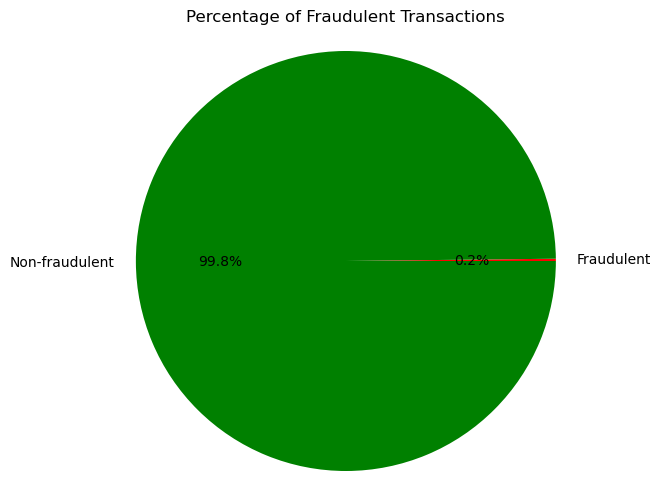

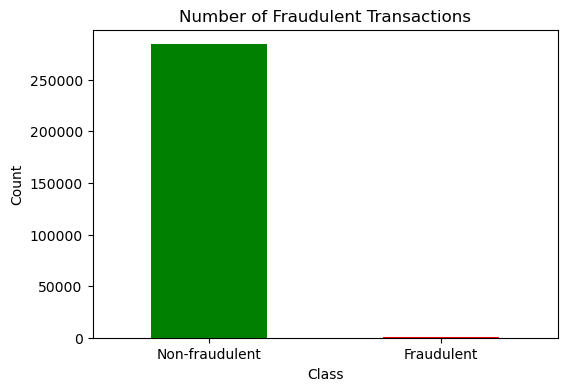

In [41]:
fraudulent_transactions = data[data['Class'] == 1]
num_fraudulent_transactions = len(fraudulent_transactions)

plt.figure(figsize=(8, 6))
plt.pie([num_fraudulent_transactions, len(data) - num_fraudulent_transactions], labels=['Fraudulent', 'Non-fraudulent'], autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Percentage of Fraudulent Transactions')
plt.axis('equal')
plt.show()

plt.figure(figsize=(6, 4))
data['Class'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Number of Fraudulent Transactions')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-fraudulent', 'Fraudulent'], rotation=0)
plt.show()

#### 8. Check the maximum and minimum fraudulent amount.

In [42]:
max_fraudulent_amount = fraudulent_transactions['Amount'].max()
min_fraudulent_amount = fraudulent_transactions['Amount'].min()

print("Maximum fraudulent amount:", max_fraudulent_amount)
print("Minimum fraudulent amount:", min_fraudulent_amount)

Maximum fraudulent amount: 2125.87
Minimum fraudulent amount: 0.0


#### 9. Check the number of transactions where the transaction amount is zeroand consider as a fraud transaction

In [43]:
zero_amount_fraudulent_transactions = data[(data['Amount'] == 0) & (data['Class'] == 1)]
num_zero_amount_fraudulent_transactions = len(zero_amount_fraudulent_transactions)

print("Number of transactions with zero amount considered as fraud:", num_zero_amount_fraudulent_transactions)

Number of transactions with zero amount considered as fraud: 27


#### 10. Check the distribution of columns. List down columns that are normally distributed. List down columns that are not normally distributed

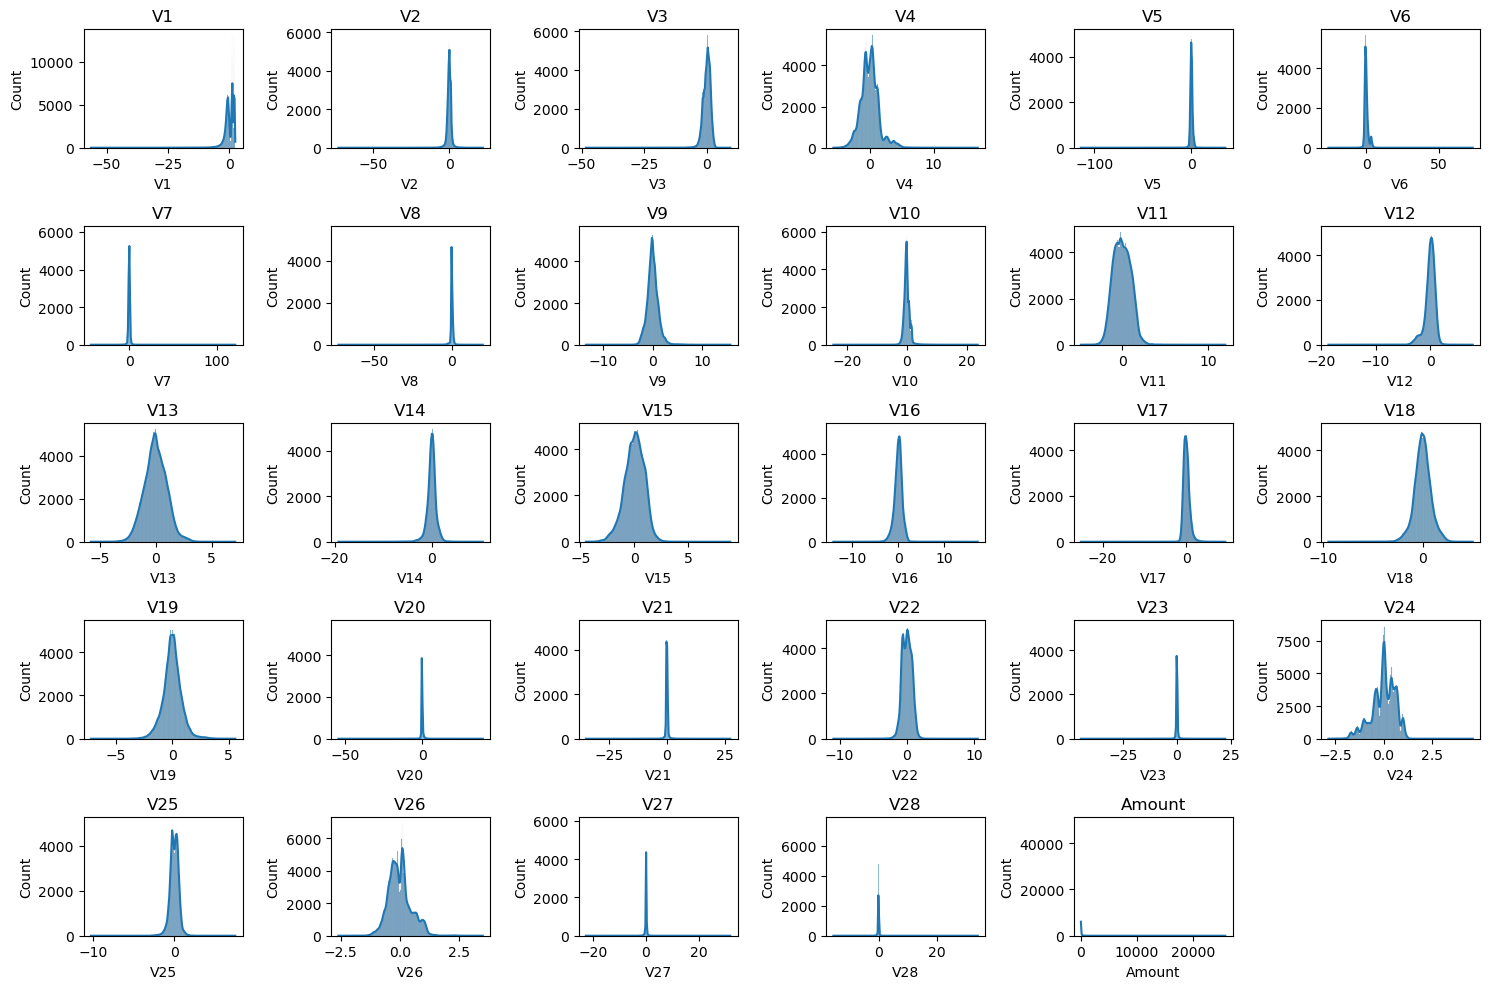

Columns that are normally distributed:
['V11', 'V13', 'V15', 'V18', 'V19', 'V22', 'V25']

Columns that are not normally distributed:
['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V12', 'V14', 'V16', 'V17', 'V20', 'V21', 'V23', 'V24', 'V26', 'V27', 'V28', 'Amount']


In [44]:
numerical_columns = data.drop(['Time', 'Class'], axis=1).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 6, i)
    sns.histplot(data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

skewness = data[numerical_columns].skew()
skewness_threshold = 0.5  

normally_distributed_cols = skewness[abs(skewness) < skewness_threshold].index.tolist()
non_normally_distributed_cols = skewness[abs(skewness) >= skewness_threshold].index.tolist()

print("Columns that are normally distributed:")
print(normally_distributed_cols)
print("\nColumns that are not normally distributed:")
print(non_normally_distributed_cols)

#### 11. List down columns that are highly skewed.

In [45]:
numerical_columns = data.drop(['Time', 'Class'], axis=1).columns

skewness = data[numerical_columns].skew()

skewness_threshold = 1.0

highly_skewed_columns = skewness[abs(skewness) > skewness_threshold].index.tolist()

print("Columns that are highly skewed:")
print(highly_skewed_columns)

Columns that are highly skewed:
['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16', 'V17', 'V20', 'V21', 'V23', 'V27', 'V28', 'Amount']


#### 12. With the help of a standard scaler, normalize the respective column distribution.

In [46]:
numerical_columns = data.drop(['Time', 'Class'], axis=1).columns

scaler = StandardScaler()

data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

data[numerical_columns]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,0.083386,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,-0.153350,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,0.190700,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,-0.050468,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,0.691625,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-6.065842,6.099286,-6.486245,-1.459641,-3.886611,-1.956690,-3.975628,6.116573,1.742559,4.000715,...,1.914365,0.290602,0.154146,1.624574,-0.841000,2.756320,0.518500,2.337901,2.495529,-0.350151
284803,-0.374121,-0.033356,1.342145,-0.521651,0.629040,0.794446,0.019667,0.246886,0.532299,-0.896292,...,0.077330,0.291625,1.273781,0.019958,-1.677920,-1.163726,-0.819647,0.169641,-0.162164,-0.254117
284804,0.980024,-0.182434,-2.143205,-0.393984,1.905833,2.275262,-0.239939,0.593140,0.393630,-0.445225,...,0.001811,0.315913,0.796788,-0.060053,1.056944,0.509797,-0.181182,0.011037,-0.080467,-0.081839
284805,-0.122755,0.321250,0.463320,0.487192,-0.273836,0.468155,-0.554672,0.568631,0.356887,-0.366558,...,0.165300,0.361112,1.102451,-0.261503,0.203428,-1.091855,1.133635,0.269604,0.316687,-0.313249


#### 13. List down columns that have high kurtosis.

In [47]:
kurtosis = data[numerical_columns].kurtosis()

kurtosis_threshold = 3.0

high_kurtosis_columns = kurtosis[abs(kurtosis) > kurtosis_threshold].index.tolist()

print("Columns that have high kurtosis:")
print(high_kurtosis_columns)

Columns that have high kurtosis:
['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V12', 'V14', 'V16', 'V17', 'V20', 'V21', 'V23', 'V25', 'V27', 'V28', 'Amount']


#### 14. What is the distribution of Time and Amount columns in the dataset ?

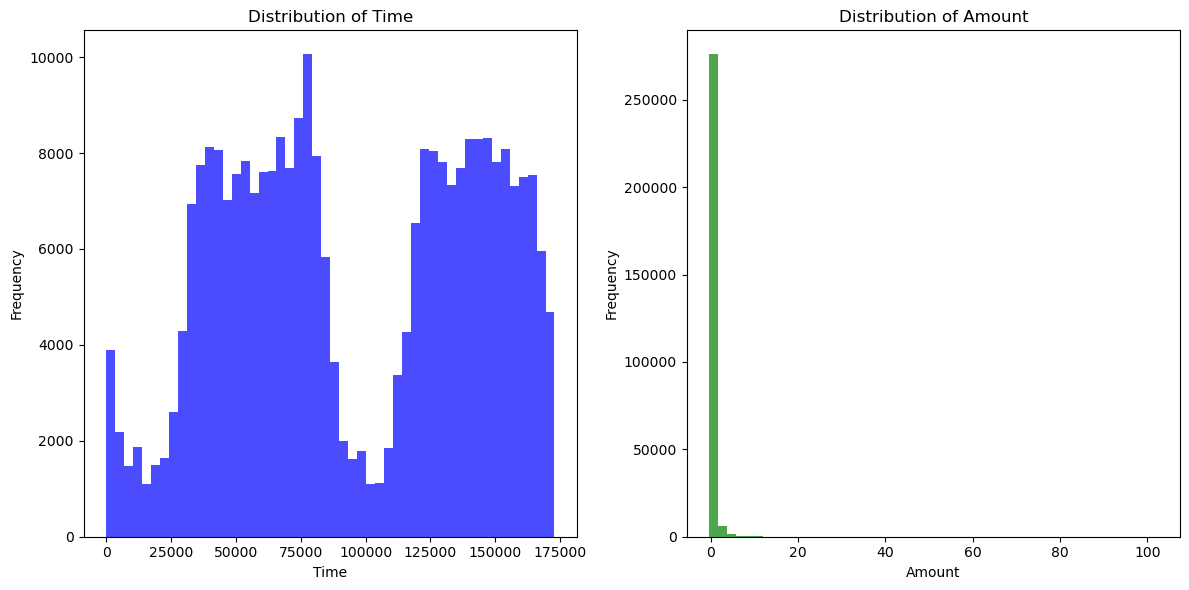

In [48]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(data['Time'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Time')
plt.xlabel('Time')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(data['Amount'], bins=50, color='green', alpha=0.7)
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### 15. Find the distribution of all variables with respect to the outcome ‘Class’ variable.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

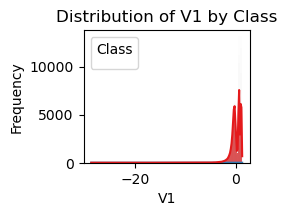

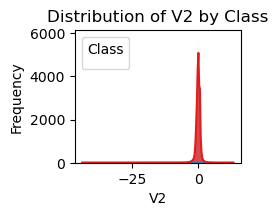

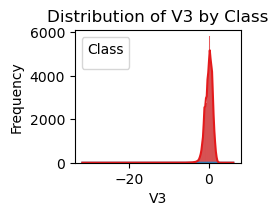

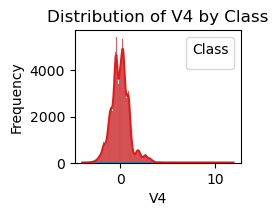

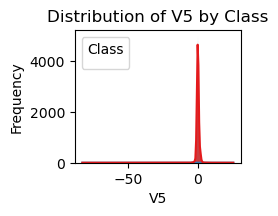

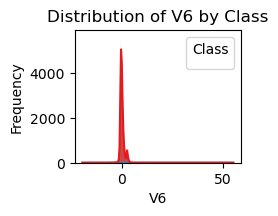

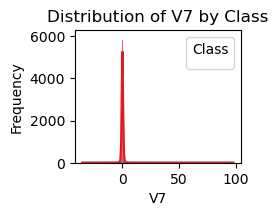

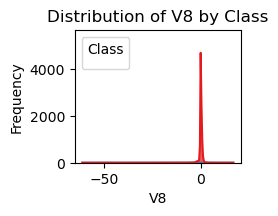

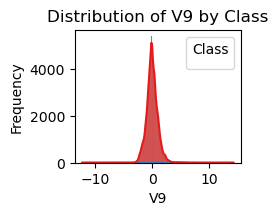

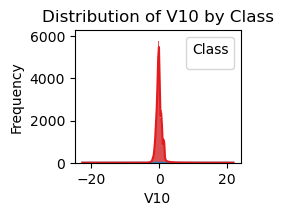

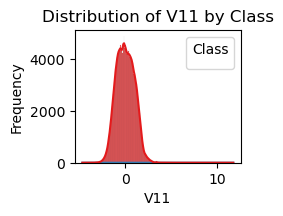

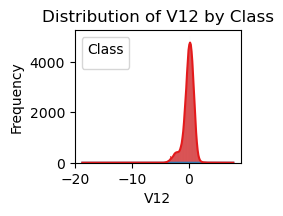

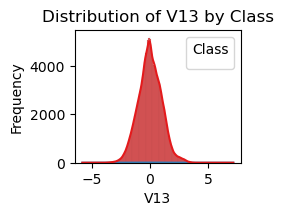

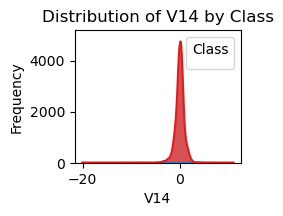

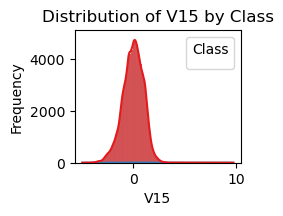

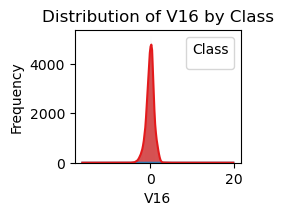

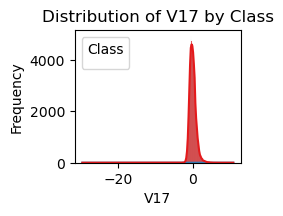

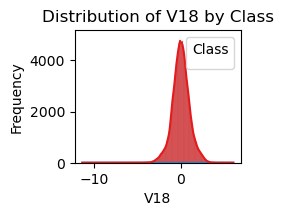

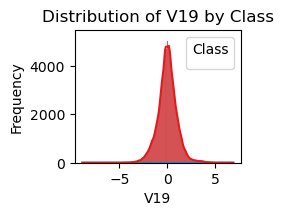

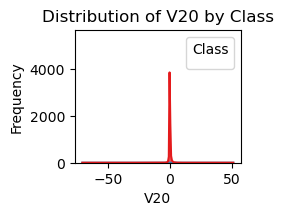

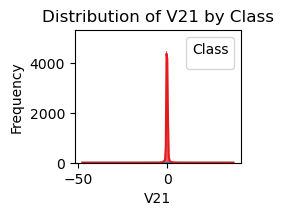

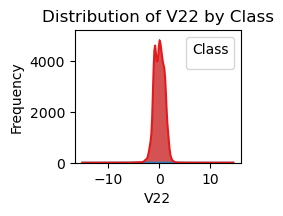

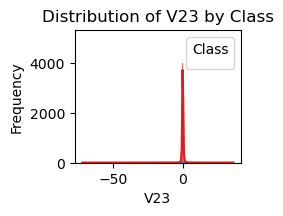

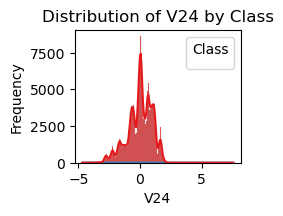

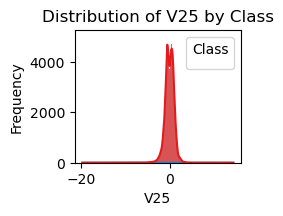

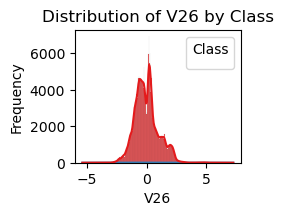

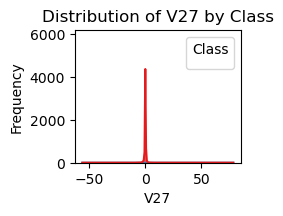

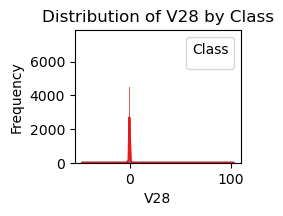

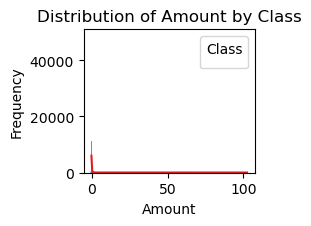

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns


# Get the list of all columns except 'Class'
all_columns = data.columns.tolist()
all_columns.remove('Class')

# Plotting the distribution of each variable with respect to the 'Class' variable
for col in all_columns:
    plt.figure(figsize=(15, 10))
    plt.subplot(5, 6, 2)
    sns.histplot(data=data, x=col, hue='Class', kde=True, palette='Set1', alpha=0.7)
    plt.title(f'Distribution of {col} by Class')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend(title='Class')
plt.tight_layout()
plt.show()


#### 16. Create a countplot for the outcome class in seaborn using percentage instead of count for each bar.

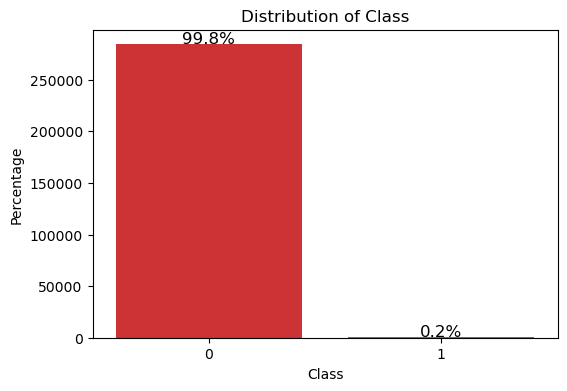

In [53]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Class', palette='Set1')

# Calculate the percentage for each class
total = len(data)
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 500, '{:.1f}%'.format(height / total * 100),
                   ha='center', color='black', fontsize=12)

plt.title('Distribution of Class')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.show()

#### 17. Plot a heatmap for correlation matrix for the given dataset. Write the Observation. Especially note down columns that are highly correlated (Positive and Negative Correlation, Consider 0.7 to 1 as high).

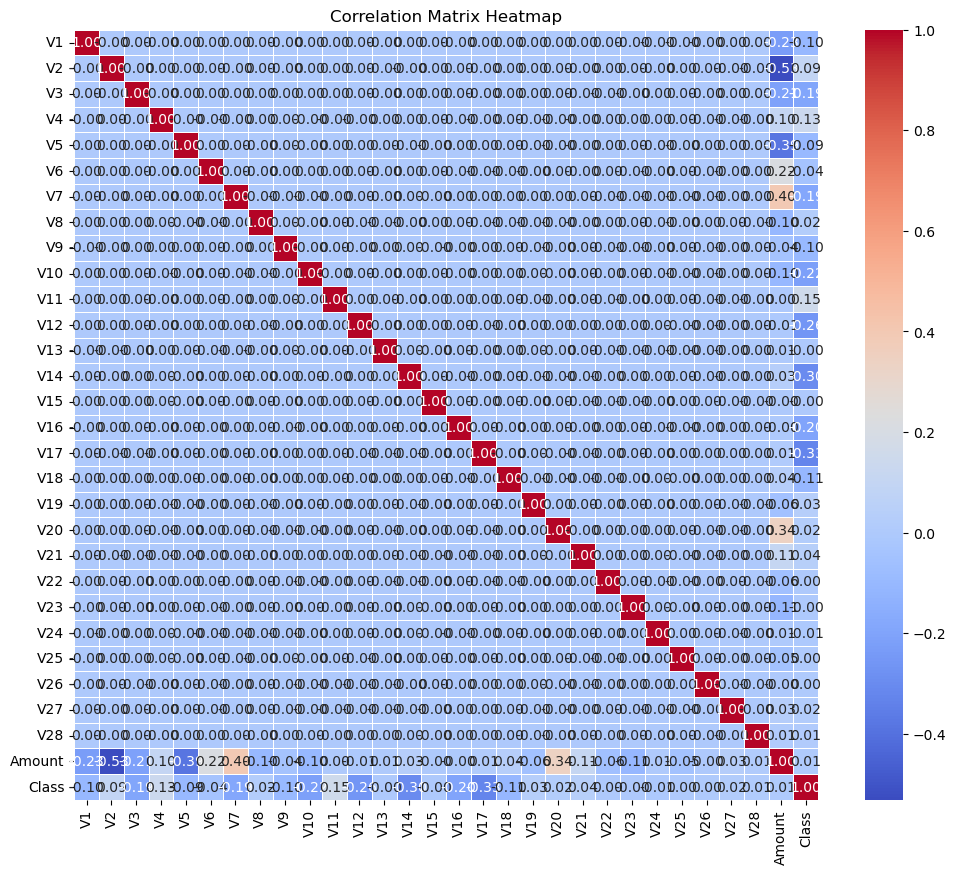

In [56]:
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

#### 18. With the help of hypothesis testing check whether fraudulent transactions of higher value than normal transactions? 

In [54]:
# H0: The mean transaction amount of fraudulent transactions is equal to the mean transaction amount of normal transactions.
# H1: The mean transaction amount of fraudulent transactions is greater than the mean transaction amount of normal transactions.

In [57]:
from scipy import stats

fraudulent_amounts = data[data['Class'] == 1]['Amount']
normal_amounts = data[data['Class'] == 0]['Amount']

t_statistic, p_value = stats.ttest_ind(fraudulent_amounts, normal_amounts, alternative='greater')

alpha = 0.05

print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis: The mean transaction amount of fraudulent transactions is greater than normal transactions.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to suggest that the mean transaction amount of fraudulent transactions is greater than normal transactions.")

T-statistic: 3.005552313971408
P-value: 0.0013256103245958494
Reject the null hypothesis: The mean transaction amount of fraudulent transactions is greater than normal transactions.


#### 19. Perform ANOVA test for Statistical feature selection.

In [58]:
from scipy.stats import f_oneway
# Assuming 'Amount' is the dependent variable and 'Class' is the independent variable
dependent_variable = 'Amount'
independent_variable = 'Class'

# Separate data into groups based on the independent variable
grouped_data = [data[dependent_variable][data[independent_variable] == category] for category in data[independent_variable].unique()]

# Perform ANOVA test
f_statistic, p_value = f_oneway(*grouped_data)

# Define significance level
alpha = 0.05

# Print the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis: There are significant differences between the groups.")
else:
    print("Fail to reject the null hypothesis: There are no significant differences between the groups.")

F-statistic: 9.033344712018893
P-value: 0.0026512206498171095
Reject the null hypothesis: There are significant differences between the groups.


#### 20. Split the dataset randomly into train and test datasets. Use a train -testratio of 70:30 ratio.

In [59]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['Class'])  # Features
y = data['Class']  # Target variable

# Split the dataset into train and test sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (199364, 29)
Shape of y_train: (199364,)
Shape of X_test: (85443, 29)
Shape of y_test: (85443,)


#### 21. These are just checkpoints. Please use your best analytical approach to build this report. You can mix match columns to create new ones which can be 7 used for better analysis. Create your own features if required. Be highly experimental and analytical here to find hidden patterns. You can use the following as checklist pointers :

* What is the shape and size of the dataset?

In [60]:
shape = data.shape

size = data.size

print("Shape of the dataset (rows, columns):", shape)
print("Size of the dataset (total number of elements):", size)

Shape of the dataset (rows, columns): (284807, 30)
Size of the dataset (total number of elements): 8544210


* Which columns are highly skewed?

In [61]:
skewness = data.skew()

highly_skewed_columns = skewness[abs(skewness) > 1]

print("Highly skewed columns:")
print(highly_skewed_columns)

Highly skewed columns:
V1        -3.280667
V2        -4.624866
V3        -2.240155
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V10        1.187141
V12       -2.278401
V14       -1.995176
V16       -1.100966
V17       -3.844914
V20       -2.037155
V21        3.592991
V23       -5.875140
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64


* Which columns are highly Kurtosis driven?

In [62]:
kurtosis_values = data.kurtosis()

# Filter columns with kurtosis greater than a threshold (e.g., 3 for moderate kurtosis)
highly_kurtosis_driven_columns = kurtosis_values[abs(kurtosis_values) > 3]

print("Columns highly driven by kurtosis:")
print(highly_kurtosis_driven_columns)

Columns highly driven by kurtosis:
V1         32.486679
V2         95.773106
V3         26.619551
V5        206.904560
V6         42.642494
V7        405.607417
V8        220.586974
V9          3.731311
V10        31.988239
V12        20.241870
V14        23.879462
V16        10.419131
V17        94.799719
V20       271.016113
V21       207.287040
V23       440.088659
V25         4.290412
V27       244.989241
V28       933.397502
Amount    845.092646
Class     573.887843
dtype: float64


* Which columns have Wrong data type?

In [63]:
data_types = data.dtypes

# Identify columns with non-numerical data types
non_numerical_columns = data_types[data_types != 'float64'][data_types != 'int64']

print("Columns with potentially wrong data types:")
print(non_numerical_columns)

Columns with potentially wrong data types:
Series([], dtype: object)


* What columns seem to have outliers based on min, max and percentile values,IQR range along with the standard deviation and mean absolute deviation?

In [64]:
# Get summary statistics for numerical columns
summary_statistics = data.describe()

Q1 = summary_statistics.loc['25%']
Q3 = summary_statistics.loc['75%']
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

std_dev = data.std()
mad = data.mad()

potential_outliers = (data < lower_bound) | (data > upper_bound)

print("Columns with potential outliers based on:")
print("- Minimum and maximum values:")
print((data < summary_statistics.loc['min']) | (data > summary_statistics.loc['max']))
print("\n- Percentile values:")
print((data < data.quantile(0.05)) | (data > data.quantile(0.95)))
print("\n- IQR range:")
print(potential_outliers)
print("\n- Standard deviation (3 * std_dev from the mean):")
print((data < (data.mean() - 3 * std_dev)) | (data > (data.mean() + 3 * std_dev)))
print("\n- Mean Absolute Deviation (3 * MAD from the median):")
print((data < (data.median() - 3 * mad)) | (data > (data.median() + 3 * mad)))


Columns with potential outliers based on:
- Minimum and maximum values:
           V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
0       False  False  False  False  False  False  False  False  False  False   
1       False  False  False  False  False  False  False  False  False  False   
2       False  False  False  False  False  False  False  False  False  False   
3       False  False  False  False  False  False  False  False  False  False   
4       False  False  False  False  False  False  False  False  False  False   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
284802  False  False  False  False  False  False  False  False  False  False   
284803  False  False  False  False  False  False  False  False  False  False   
284804  False  False  False  False  False  False  False  False  False  False   
284805  False  False  False  False  False  False  False  False  False  False   
284806  False  False  False  False  False  False

           V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
0       False  False  False  False  False  False  False  False  False  False   
1       False  False  False  False  False  False  False  False  False  False   
2       False  False  False  False  False  False  False  False  False  False   
3       False  False  False  False  False  False  False  False  False  False   
4       False  False  False  False  False  False  False  False  False  False   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
284802   True   True   True  False   True  False   True   True  False   True   
284803  False  False  False  False  False  False  False  False  False  False   
284804  False  False   True  False  False   True  False  False  False  False   
284805  False  False  False  False  False  False  False  False  False  False   
284806  False  False  False  False  False  False  False  False  False  False   

        ...    V21    V22    V23    V24

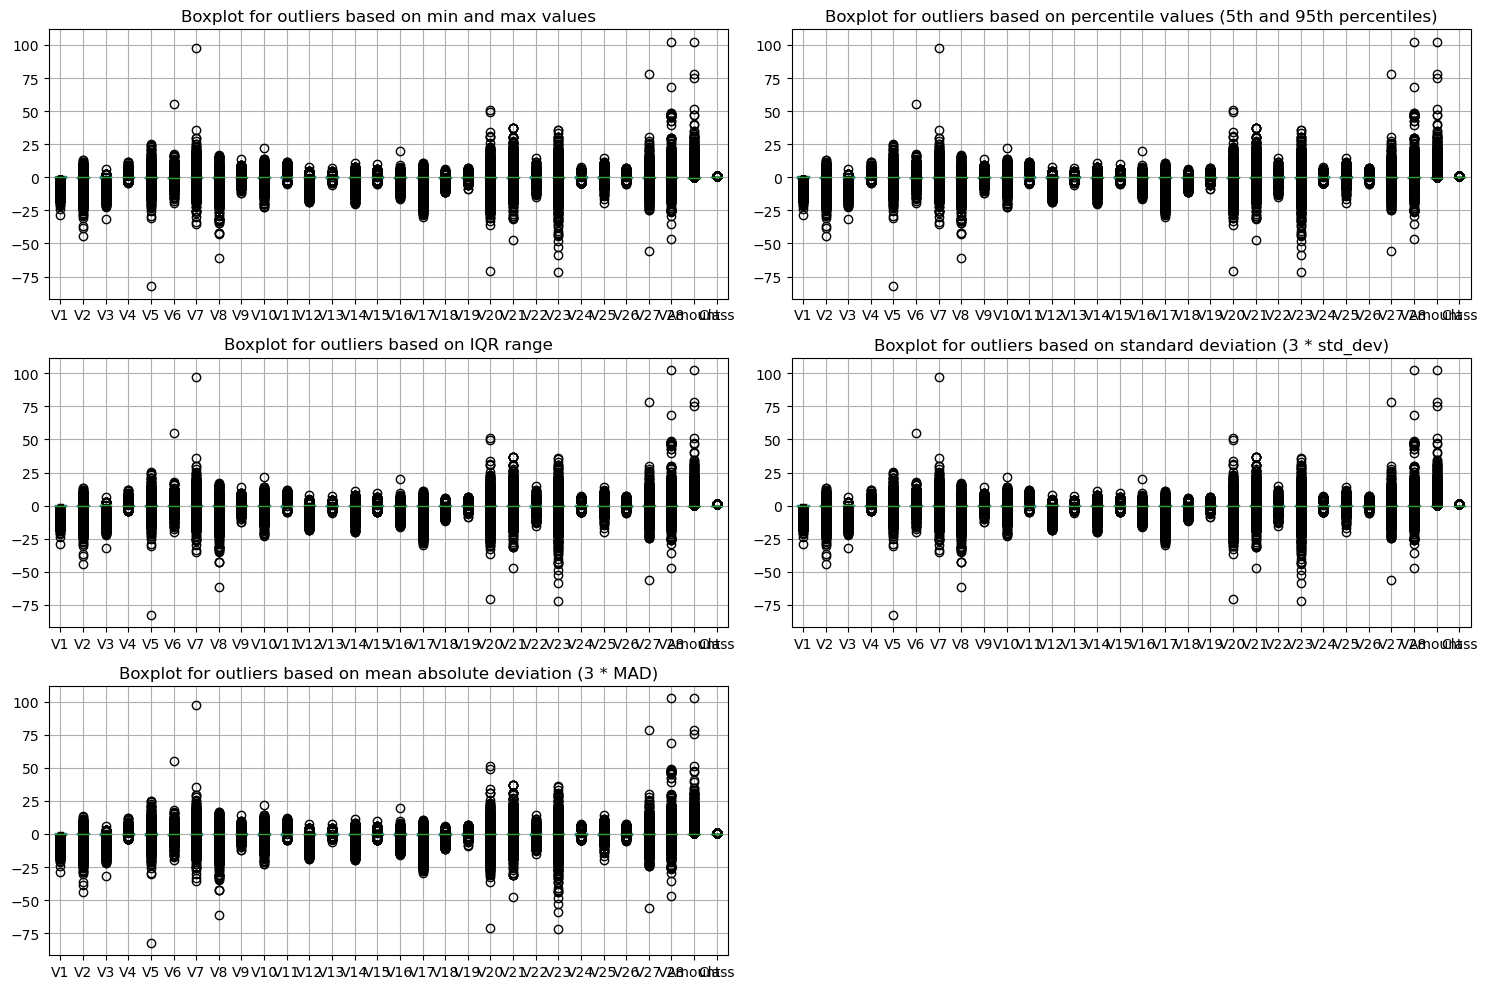

In [66]:
# Calculate summary statistics for numerical columns
summary_statistics = data.describe()

# Calculate IQR (Interquartile Range)
Q1 = summary_statistics.loc['25%']
Q3 = summary_statistics.loc['75%']
IQR = Q3 - Q1

# Calculate thresholds for identifying outliers using IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Calculate standard deviation and mean absolute deviation (MAD)
std_dev = data.std()
mad = data.mad()

# Create boxplots for outliers based on different measures
plt.figure(figsize=(15, 10))

# Boxplot for outliers based on min and max values
plt.subplot(3, 2, 1)
data.boxplot(column=data.columns.tolist())
plt.title("Boxplot for outliers based on min and max values")

# Boxplot for outliers based on percentile values
plt.subplot(3, 2, 2)
data.boxplot(column=data.columns.tolist())
plt.title("Boxplot for outliers based on percentile values (5th and 95th percentiles)")

# Boxplot for outliers based on IQR range
plt.subplot(3, 2, 3)
data.boxplot(column=data.columns.tolist())
plt.title("Boxplot for outliers based on IQR range")

# Boxplot for outliers based on standard deviation (3 * std_dev from the mean)
plt.subplot(3, 2, 4)
data.boxplot(column=data.columns.tolist())
plt.title("Boxplot for outliers based on standard deviation (3 * std_dev)")

# Boxplot for outliers based on mean absolute deviation (3 * MAD from the median)
plt.subplot(3, 2, 5)
data.boxplot(column=data.columns.tolist())
plt.title("Boxplot for outliers based on mean absolute deviation (3 * MAD)")

plt.tight_layout()
plt.show()


* What columns have missing values? (Check the Missing Values section in Pandas Profiling)

In [67]:
missing_values = data.isnull().sum()

print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Series([], dtype: int64)


* What columns have high amount of zero and make sure that these zeroes are supposed to be there( for eg. Weight cannot be zero and any percentage of zeroin column zero is erroneous)

In [68]:
zero_counts = (data == 0).sum() / len(data)

# Define a threshold for the proportion of zeros (e.g., 10%)
threshold = 0.1

# Filter columns with a high proportion of zeros
high_zero_columns = zero_counts[zero_counts > threshold]

print("Columns with a high proportion of zeros:")
print(high_zero_columns)

Columns with a high proportion of zeros:
Class    0.998273
dtype: float64


* What columns have high variance and standard deviation?

In [69]:
variance = data.var()
std_deviation = data.std()

variance_threshold = 1  # Adjust as needed
std_deviation_threshold = 1  # Adjust as needed

# Filter columns with high variance and standard deviation
high_variance_columns = variance[variance > variance_threshold]
high_std_deviation_columns = std_deviation[std_deviation > std_deviation_threshold]

print("Columns with high variance:")
print(high_variance_columns)

print("\nColumns with high standard deviation:")
print(high_std_deviation_columns)

Columns with high variance:
V1        1.000004
V2        1.000004
V3        1.000004
V4        1.000004
V5        1.000004
V6        1.000004
V7        1.000004
V8        1.000004
V9        1.000004
V10       1.000004
V11       1.000004
V12       1.000004
V13       1.000004
V14       1.000004
V15       1.000004
V16       1.000004
V17       1.000004
V18       1.000004
V19       1.000004
V20       1.000004
V21       1.000004
V22       1.000004
V23       1.000004
V24       1.000004
V25       1.000004
V26       1.000004
V27       1.000004
V28       1.000004
Amount    1.000004
dtype: float64

Columns with high standard deviation:
V1        1.000002
V2        1.000002
V3        1.000002
V4        1.000002
V5        1.000002
V6        1.000002
V7        1.000002
V8        1.000002
V9        1.000002
V10       1.000002
V11       1.000002
V12       1.000002
V13       1.000002
V14       1.000002
V15       1.000002
V16       1.000002
V17       1.000002
V18       1.000002
V19       1.000002
V20   

* Comment on the distribution of the continuous values (Real Number: ℝ≥0)

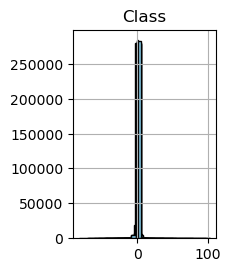

In [73]:
continuous_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for continuous columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_columns, 1):
    plt.subplot(4, 7, 2)
    data[col].hist(bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
plt.tight_layout()
plt.show()

* Do you see any alarming trends in the extreme values (minimum 5 and maximum 5)?

In [74]:
# Extract minimum and maximum values for each numerical column
min_values = data.min()
max_values = data.max()

# Combine minimum and maximum values into a single DataFrame
extreme_values = pd.concat([min_values, max_values], axis=1)
extreme_values.columns = ['Min Value', 'Max Value']

# Sort extreme values by maximum value to identify the top 5 maximum values
top_max_values = extreme_values.sort_values(by='Max Value', ascending=False).head(5)

# Sort extreme values by minimum value to identify the top 5 minimum values
top_min_values = extreme_values.sort_values(by='Min Value').head(5)

print("Top 5 maximum values:")
print(top_max_values)
print("\nTop 5 minimum values:")
print(top_min_values)


Top 5 maximum values:
        Min Value   Max Value
V28    -46.746117  102.543421
Amount  -0.353229  102.362243
V7     -35.209396   97.478239
V27    -55.906596   78.319397
V6     -19.636058   55.020149

Top 5 minimum values:
     Min Value  Max Value
V5  -82.408097  25.214135
V23 -71.754464  36.076675
V20 -70.691461  51.134640
V8  -61.302524  16.751534
V27 -55.906596  78.319397


* How many Boolean columns are there in the data set and out of those howmany are imbalanced?

In [75]:
boolean_columns = [col for col in data.columns if data[col].nunique() == 2 and data[col].dtype == 'int64']

# Check for imbalance in boolean columns
imbalanced_columns = []
for col in boolean_columns:
    counts = data[col].value_counts()
    if min(counts) / sum(counts) < 0.05 or max(counts) / sum(counts) < 0.05:
        imbalanced_columns.append(col)

num_boolean_columns = len(boolean_columns)
num_imbalanced_columns = len(imbalanced_columns)

print("Number of boolean columns:", num_boolean_columns)
print("Number of imbalanced boolean columns:", num_imbalanced_columns)

Number of boolean columns: 1
Number of imbalanced boolean columns: 1


* Check for duplicate records across all columns (Check Warning Section)

In [76]:
duplicate_records = data[data.duplicated()]

# Count the number of duplicate records
num_duplicate_records = len(duplicate_records)

if num_duplicate_records > 0:
    print("Number of duplicate records:", num_duplicate_records)
    print("Duplicate records:")
    print(duplicate_records)
else:
    print("No duplicate records found.")

Number of duplicate records: 9144
Duplicate records:
              V1        V2        V3        V4        V5        V6        V7  \
33     -0.270544  0.529212  0.888538  0.102733  0.300098  0.075227  0.574902   
35     -0.273339  0.523990  0.891063  0.104230  0.314205  0.065289  0.560217   
113     0.530134  0.077203  0.121652  0.783937  0.320015  0.709528 -0.029678   
114     0.530134  0.077203  0.121652  0.783937  0.320015  0.709528 -0.029678   
115     0.530134  0.077203  0.121652  0.783937  0.320015  0.709528 -0.029678   
...          ...       ...       ...       ...       ...       ...       ...   
284708  1.030333  0.044344 -1.065228  0.247946  0.241918 -0.507618  0.040801   
284751  1.046992 -0.220438 -1.677058 -0.515132  1.730458  2.490500 -0.387310   
284775  0.998394 -0.438808 -1.125480 -0.431640  1.239568  2.938007 -1.009376   
284785  0.016790  0.330246 -0.782089 -1.221745  2.124490  2.553186  0.272764   
284793  1.006285 -0.423342 -1.119564 -0.436230  1.245284  2.935846 

* Is there any imbalance in the categorical columns? (for example Gender Male and Female in which Male is 95% and Female is just 5%- How many columns are categorical?)

In [77]:
categorical_columns = data.select_dtypes(include=['object']).columns

# Check for imbalance in categorical columns
imbalanced_categorical_columns = []
for col in categorical_columns:
    value_counts = data[col].value_counts(normalize=True)
    if max(value_counts) > 0.95:
        imbalanced_categorical_columns.append(col)

num_categorical_columns = len(categorical_columns)
num_imbalanced_categorical_columns = len(imbalanced_categorical_columns)

print("Number of categorical columns:", num_categorical_columns)
print("Number of imbalanced categorical columns:", num_imbalanced_categorical_columns)

Number of categorical columns: 0
Number of imbalanced categorical columns: 0


* Are those categories in sync with the domain categories?

In [83]:

# Check if categories are in sync with domain categories
for col in imbalanced_categorical_columns:
    unique_categories = data[col].unique()
    expected = expected_categories.get(col)
    if expected:
        if set(unique_categories) != set(expected):
            print(f"Warning: Categories in {col} are not in sync with domain categories.")
            print(f"Unique categories in data: {unique_categories}")
            print(f"Expected categories: {expected}")
    else:
        print(f"Warning: No expected categories provided for {col}.")


*  Check if all the categories are unique and they represent distinct informationBased on the above questions and your observations, chart out a plan for Data Pre-processing and feature engineering

In [82]:
categorical_columns = data.select_dtypes(include=['object']).columns

# Check uniqueness of categories within each categorical column
unique_categories = {}
for col in categorical_columns:
    unique_categories[col] = data[col].nunique()

print("Number of unique categories within each categorical column:")
print(unique_categories)


Number of unique categories within each categorical column:
{}
